In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Load the dataset into python environment**

In [3]:
df = pd.read_csv("/content/sample_data/titanic_dataset.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **3. Check the basic details of the dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **4. Fill in all the missing values present in all the columns in the dataset**

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Since "Cabin" column has got more than 75% null values, it is better to drop the column "Cabin"

df.drop(['Cabin'],axis = 1, inplace = True)

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## **5. Check and handle outliers in at least 3 columns in the dataset**

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


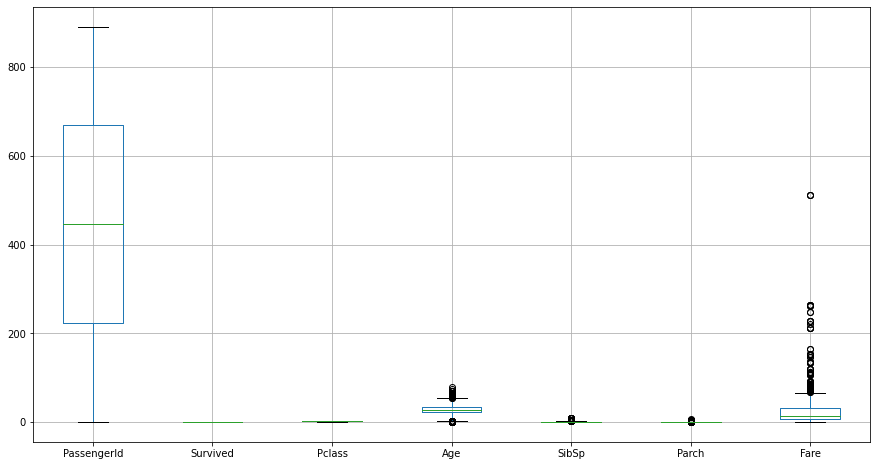

In [11]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.show()

In [12]:
# We can see outliers in Age, Sibsp, fare and Parch 

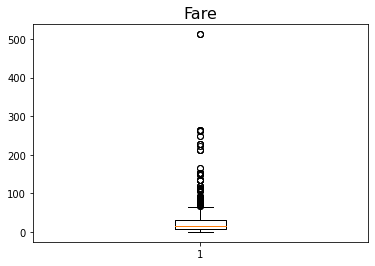

In [13]:
plt.figure()
plt.boxplot(df['Fare'])
plt.title("Fare",fontsize=16)
plt.show()

In [14]:
q1 = np.percentile(df['Fare'],25,interpolation = 'midpoint')
q2 = np.percentile(df['Fare'],50,interpolation = 'midpoint')
q3 = np.percentile(df['Fare'],75,interpolation = 'midpoint')

iqr = q3 - q1

lowerLimit = q1 - (1.5 * iqr)
upperLimit = q3 + (1.5 * iqr)

print(" Q1 = {0} \n Q2 = {1} \n Q3 = {2} \n IQR = {3} \n Lower Limit = {4} \n Upper Limit = {5}"
     .format(q1,q2,q3,iqr,lowerLimit,upperLimit))

 Q1 = 7.9104 
 Q2 = 14.4542 
 Q3 = 31.0 
 IQR = 23.0896 
 Lower Limit = -26.724 
 Upper Limit = 65.6344


In [15]:
df['Fare'].median()

14.4542

In [16]:
outlier =[]

for i in df['Fare']:
    if i<lowerLimit or i>upperLimit:
        outlier.append(i)
print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [17]:
df = df[(df.Fare>lowerLimit) & (df.Fare<upperLimit)]

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q


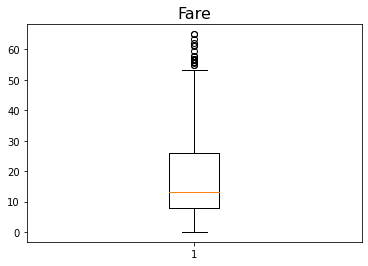

In [18]:
plt.figure()
plt.boxplot(df['Fare'])
plt.title("Fare",fontsize=16)
plt.show()

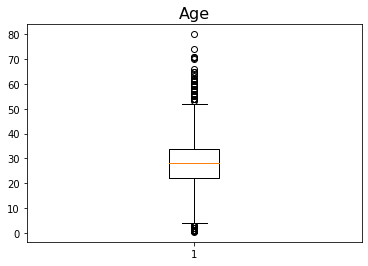

In [19]:
plt.figure()
plt.boxplot(df['Age'])
plt.title("Age",fontsize=16)
plt.show()


In [20]:
q1 = df.Age.quantile(0.25)
q2 = df.Age.quantile(0.50)
q3 = df.Age.quantile(0.75)

iqr = q3 -q1

lowerLimit = q1 - (1.5 * iqr)
upperLimit = q3 + (1.5 * iqr)
print(" Q1 = {0} \n Q2 = {1} \n Q3 = {2} \n IQR = {3} \n Lower Limit = {4} \n Upper Limit = {5}"
     .format(q1,q2,q3,iqr,lowerLimit,upperLimit))

 Q1 = 22.0 
 Q2 = 28.0 
 Q3 = 34.0 
 IQR = 12.0 
 Lower Limit = 4.0 
 Upper Limit = 52.0


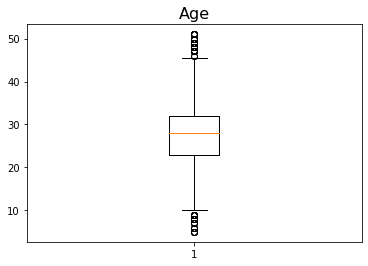

In [21]:
df = df[(df.Age > lowerLimit) & (df.Age <upperLimit)]

plt.figure()
plt.boxplot(df['Age'])
plt.title("Age",fontsize=16)
plt.show()

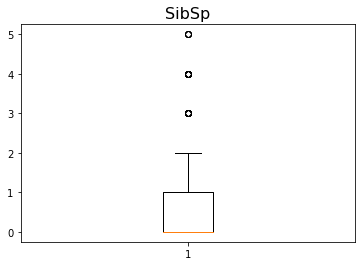

In [22]:
plt.figure()
plt.boxplot(df['SibSp'])
plt.title("SibSp",fontsize=16)
plt.show()

In [23]:
q1 = df.SibSp.quantile(0.25)
q2 = df.SibSp.quantile(0.50)
q3 = df.SibSp.quantile(0.75)

iqr = q3 -q1

lowerLimit = q1 - (1.5 * iqr)
upperLimit = q3 + (1.5 * iqr)
print(" Q1 = {0} \n Q2 = {1} \n Q3 = {2} \n IQR = {3} \n Lower Limit = {4} \n Upper Limit = {5}"
     .format(q1,q2,q3,iqr,lowerLimit,upperLimit))

 Q1 = 0.0 
 Q2 = 0.0 
 Q3 = 1.0 
 IQR = 1.0 
 Lower Limit = -1.5 
 Upper Limit = 2.5


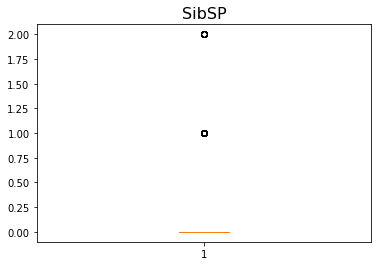

In [24]:
df = df[(df.SibSp > lowerLimit) & (df.SibSp <upperLimit)]

plt.figure()
plt.boxplot(df['SibSp'])
plt.title("SibSP",fontsize=16)
plt.show()

## **6. Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [26]:
from sklearn import preprocessing
minMax = preprocessing.MinMaxScaler(feature_range=(0,1))

In [27]:
y = df['Survived']
x = df.drop(['Survived','Name','Sex','Ticket','Embarked'],axis=1)

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

from sklearn import linear_model

lr = linear_model.LinearRegression()
model = lr.fit(xtrain,ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_squared_error

print("MSE is : ",mean_squared_error(ytest,predictions))

from sklearn.metrics import r2_score

print("R squared value is : ",r2_score(ytest,predictions))

MSE is :  0.19955223719398898
R squared value is :  0.02862192231291405


In [28]:
x = df.drop(['Survived','Name','Sex','Ticket','Embarked'],axis =1)
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,450.851190,2.502976,28.732143,0.261905,0.261905,16.541728
std,258.656316,0.722219,8.696641,0.491212,0.752447,13.302725
min,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,24.000000,0.000000,0.000000,7.854200
50%,450.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,672.500000,3.000000,33.000000,0.000000,0.000000,23.300000
max,891.000000,3.000000,51.000000,2.000000,6.000000,65.000000


In [29]:
x = minMax.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,0.505451,0.751488,0.515916,0.130952,0.043651,0.254488
std,0.290625,0.361110,0.189057,0.245606,0.125408,0.204657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249157,0.500000,0.413043,0.000000,0.000000,0.120834
50%,0.504494,1.000000,0.500000,0.000000,0.000000,0.161538
75%,0.754494,1.000000,0.608696,0.000000,0.000000,0.358462
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(xtrain,ytrain)
predictions = model.predict(xtest)
print("MSE is : ",mean_squared_error(ytest,predictions))
print("R squared value is : ",r2_score(ytest,predictions))

MSE is :  0.19955223719398893
R squared value is :  0.028621922312914272


In [31]:
# We can see that there is no difference in the MSE and R square value before and after scaling